# Grover's Search Algorithm

$$\renewcommand\ket[1]{\left| #1 \right\rangle}$$

Grover's search algorithm was first invented by Luv Grover (who was employed at Bell labs) in 1996.

<div class="alert alert-block alert-info">
    Grover L.K.: A fast quantum mechanical algorithm for database search, Proceedings, 28th Annual ACM Symposium on the Theory of Computing, (May 1996) p. 212
</div>

It allows us to search for a particular item in a _database_ of $N$ items in time $O(\sqrt{N})$. Classically, the best we can do is $O(N)$ since the item may actually be the last one we see in the worst case. This quadratic speedup is very suprising and goes to the essence of how one may exploit quantum parallelism.
In practice, think of $N$ as all possible Boolean combination of $m$ bits: $N = 2^m$ and our search as one of finding the Boolean combination that makes a given Boolean formula true. In this manner, Grover's search can solve SAT in time $O(2^{m/2})$ which is still faster than the best known classical algorithm for SAT.

We will describe Grover's algorithm in these notes.


## Oracle

We are given a oracle in the form of a classical circuit $f(b_1, \ldots, b_n)$. Our goal is to search for an input that makes $f(b_1, \ldots, b_n) = 1$. 

<div class="alert alert-block alert-info" style="border:1px 0px 0px 0px">

  We will assume for simplicity that there is a unique value of $b_1, \ldots, b_n$ that satisfies $f$.

</div>

We can convert $f$ into a quantum circuit that given $\ket{b_1 \ldots b_n} \otimes \ket{r}$ where $r$ is the result qubit, the circuit computes $\ket{b_1 \ldots b_n} \otimes \ket{r \oplus f(b_1, \ldots, b_n)}$. Let $Q_f$ e the resulting circuit/unitary operator:

$$ \ket{b_1 \ldots b_n}\otimes \ket{r} \xrightarrow{Q_f} \ket{b_1 \ldots b_n} \otimes \ket{r \oplus f(b_1, \ldots, b_n)}$$

In other words, the input qubits are unchanged whereas the result qubit's value is XORed with the function $f$ we wish to compute. We already saw examples of how this can be achieved for any classical Boolean circuit with the use of some ancillary qubits that are mostly ignored through the rest of the computation.

## Quantum Kickback

For Grover's search algorithm, we would like to implement an Oracle that "marks" the "correct answer" by negating its amplitude. 

### Example

Suppose our function was $f(b_1,b_2, b_3) = b_1 \land \neg b_2 \land b_3 $. We would like a  oracle $U_f$ to 
transform the pure state $\ket{101}$ into $-\ket{101}$ and leave every other pure state unchanged. 

As an example the super position: 
$$\frac{1}{\sqrt{7}} ( \ket{000} + 2 \ket{101} + \ket{111} + \ket{100}) \xrightarrow{U_f} \frac{1}{\sqrt{7}} ( \ket{000} \mathbf{-} 2 \ket{101} + \ket{111} + \ket{100}) $$
Note how the oracle changes the "+2" amplitude associated with the correct answer to "-2" by negating its amplitude. 

__Note__ We do not ask for a special result qubit in this oracle. It signals the result in the amplitude by marking those states with $f(b_1, \ldots, b_n) = 1$ by negating the amplitude associated with $\ket{b_1 \ldots  b_n}$.

In general, for a Boolean function $f(b_1, \ldots, b_n)$ we wish to compute an oracle that transforms
pure state $\ket{b_1 \ldots b_n}$ into $ (-1)^{f(b_1, \ldots, b_n)} \ket{b_1 \ldots b_n}$.

There is an elegant way to achieve this using the idea of translating the classical circuit for $f$ into a quantum circuit $Q_f$.

Note that $Q_f$ requires a _result qubit_ and it transforms 

$$ \ket{b_1\cdots b_n} \otimes \ket{r} \xrightarrow{Q_f} \ket{b_1\cdots b_n} \otimes \ket{r \oplus f(b_1, \ldots, b_n)} $$

Suppose we pass the super position $\ket{r} = \frac{1}{\sqrt{2}} ( \ket{0} - \ket{1} )$ in place of the result qubit. This is obtained by computing the Hadamard gate on the pure state $\ket{1}$.

Let $z$ represent the balue of $f(b_1, \ldots, b_n)$. We have 
$$\ket{b_1\cdots b_n} \otimes \frac{(\ket{0} -\ket{1})}{\sqrt{2}} \xrightarrow{Q_f} 
\frac{1}{\sqrt{2}} \left( \ket{b_1\cdots b_n} \otimes \ket{0 \oplus z} - \ket{b_1\cdots b_n} \otimes \ket{1 \oplus z} \right) $$

If $z = f(b_1, \ldots, b_n) = 1$, we have 

$$\begin{array}{rcl}
\ket{b_1\cdots b_n} \otimes \frac{(\ket{0} -\ket{1})}{\sqrt{2}} & \xrightarrow{Q_f}&   \frac{1}{\sqrt{2}} \left( \ket{b_1\cdots b_n} \otimes \ket{0 \oplus 1} - \ket{b_1\cdots b_n} \otimes \ket{1 \oplus 1} \right)\\
& = & \frac{1}{\sqrt{2}} \left( \ket{b_1\cdots b_n} \otimes \ket{1} - \ket{b_1\cdots b_n} \otimes \ket{0} \right) \\ 
& =  & - \ket{b_1\cdots b_n} \otimes  \frac{(\ket{0} -\ket{1})}{\sqrt{2}} \\
\end{array}$$

If $z = f(b_1, \ldots, b_n) = 0$, we have 
$$\begin{array}{rcl}
\ket{b_1\cdots b_n} \otimes \frac{(\ket{0} -\ket{1})}{\sqrt{2}} & \xrightarrow{Q_f}&   \frac{1}{\sqrt{2}} \left( \ket{b_1\cdots b_n} \otimes \ket{0 \oplus 0} - \ket{b_1\cdots b_n} \otimes \ket{1 \oplus 0} \right)\\
& = & \frac{1}{\sqrt{2}} \left( \ket{b_1\cdots b_n} \otimes \ket{0} - \ket{b_1\cdots b_n} \otimes \ket{1} \right) \\ 
& = & + \ket{b_1\cdots b_n} \otimes  \frac{(\ket{0} -\ket{1})}{\sqrt{2}} \\
\end{array}$$

In other words, if we prepared a quantum version $Q_f$ of our classical circuit and fed the state 
$\ket{-} = \frac{1}{\sqrt{2}} ( \ket{0} - \ket{1}) = H \ket{1}$, we obtain the desired effect of negating the amplitude for those states for which the $f(b_1, \ldots, b_n) = 1$.

In other words, 

$$ Q_f ( \ket{\psi} \otimes \ket{-} ) =  (U_f \ket{\psi}) \otimes \ket{-} $$

This allows us to transform the quantum version of a classical circuit $Q_f$ into the oracle $U_f$ that "marks" the appropriate pure state in the super position.

The key benefit of using quantum kickback is that the result register ends up retaining its original value and is not entangled with the remaining qubits. It can now be reused, which was previously not the case.

## Example

Consider the simple Boolean function $$f(b_1, b_2, b_3) = (b_1 \land \neg b_2 \land b_3)$$ 
We will implement it using a quantum circuit and feed the state $\ket{-} = H \ket{1}$ into the result register.
This will end up marking all the pure states for which $f(b_1, b_2, b_3) = 1$ with a negative amplitude. 
In this case, the only marked state will be $\ket{101}$.

In [ ]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import Aer

def create_quantum_circuit():
    inputs = QuantumRegister(3,'b') # input register = 3 qubits
    output = QuantumRegister(1, 'r') # output register = 1 qubit 
    qc = QuantumCircuit(inputs, output)
    # initialize the three gates to a uniform super position
    qc.h(inputs[0])
    qc.h(inputs[1])
    qc.h(inputs[2])
    # initialize the result register to 1/sqrt(2) ( |0> - |1> )
    qc.x(output[0]) # first apply the not gate to turn it from |0> to |1>
    qc.h(output[0]) # apply hadamard gate 
    ## Now create the circuit for f
    #negage b2
    qc.x(inputs[1])
    # and the three gates into output
    # we will use the multi-controlled x gate with b1, b2, b3 as controls and r as the output
    qc.mcx([inputs[0], inputs[1], inputs[2]], output[0])
    # restore the b2 line back to original value
    qc.x(inputs[1])
    # this is it!!
    return qc 
    
# Let's execute the circuit
qc = create_quantum_circuit()
qc.draw('mpl', style="iqp")


In [ ]:
# Execute the circuit 
backend = Aer.get_backend('statevector_simulator')
job = backend.run(qc)
result = job.result()
statevector = result.get_statevector() # this state vector involves 'r'
# just print the kets corresponding to 'r=|0>'
kets = ['|000>', '|001>', '|010>', '|011>', '|100>', '|101>', '|110>', '|111>' ]
states = [f'({statevector[i]*np.sqrt(2):.8f})' for i in range(8)]
print(' + '.join([s+' '+k for (s,k) in zip(states,kets)]))
# Note: the state |101> is marked with a negative value 

## Grover's Search Algorithm

Let us assume that $U_f$ is an oracle that implements the Boolean function $f(b_1, \ldots, b_n)$ such that 
it transforms $\ket{b_1 \cdots b_n}$ into $(-1)^{f(b_1, \ldots, b_n)} \ket{b_1 \cdots b_n}$ by negating the amplitude if $f(b_1, \ldots, b_n) = 1$ or leaving it unchanged otherwise. 

The key idea in Grover's search is to repeat an operation called the "diffusion operator" which has the effect of increasing the amplitude of the states $\ket{b_1 \cdots b_n}$ for which $f(b_1, \ldots, b_n) = 1$ while depressing the ones for which it is $0$. Again, we remind the reader of our initial simplifying assumption that 
$f(b_1, \ldots, b_n) = 1$ for just one value of $b_1, \ldots, b_n$. We aim to find this value out using Grover's search.



### Initializing Grover's algorithm

Grover's search first creates a uniform superposition by using the Hadamard gate on $\ket{0} \otimes \ket{0} \cdots \otimes \ket{0}$. The uniform superposition is given by 

$$ \ket{\psi_0} = \frac{1}{\sqrt{2^n}} \sum_{j=0}^{2^n-1} \ket{j} \,,$$

for convenience we write $\ket{j}$ as a standin for the ket $\ket{b_0b_1 \cdots b_n}$ such that $j = [b_{n-1} \cdots b_0]_2 = 2^{n-1} b_{n-1} + \cdots + 2^0 b_0 $.


### Grover's Search Iteration

Grover's search starts with $\ket{\psi_0}$, the initial uniform superposition and repeatedly applies the so-called "diffusion operator" (to be described below).
 - This creates a series of superpositions  $\ket{\psi_1}, \ket{\psi_2} \cdots \ket{\psi_M}$. 
 - After some pre-determined number of steps, we measure  $\ket{\psi_{M}}$. 
 - The diffusion operator is designed so that $\ket{\psi_M}$ upon measurement yields  $\ket{b_0 \cdots b_{n-1}}$ so that with high probability $f(b_0, \ldots, b_{n-1}) = 1$. 
 - We will also ensure that $M = O(\sqrt{2^n})$.



### The Diffusion Operator

To understand the diffusion operator, let us assume that $\ket{k}$ is the correct answer (remember $k$ for "korrect"). I.e, for the binary representation $b_0 \cdots b_{n-1}$ of the number $k$, $f(b_0, \ldots, b_{n-1}) = 1$.

Let us write the remaining numbers which are not equal to $k$ together as 
$$ \ket{\hat{k}} = \frac{1}{\sqrt{2^n-1}} \sum_{i=0, i \not= k}^{2^{n}-1} \ket{i} $$

$\ket{k}$ is orthogonal to $\ket{\hat{k}}$. We can thus represent them as two perpendicular axes. The uniform super-position $\ket{\psi_0} = \frac{1}{\sqrt{2^n}} \sum_{j=0}^{2^n-1} \ket{j}$ is in-fact a vector in this figure that makes an angle of $\theta = \cos^{-1}\left( \sqrt\frac{2^n-1}{2^n} \right)$ (you can work this out by simply taking the dot product between $\ket{\hat{k}}$ which is the uniform super position missing $\ket{k}$ and the uniform superposition $\ket{\psi_0}$. The figure below depicts this situation:

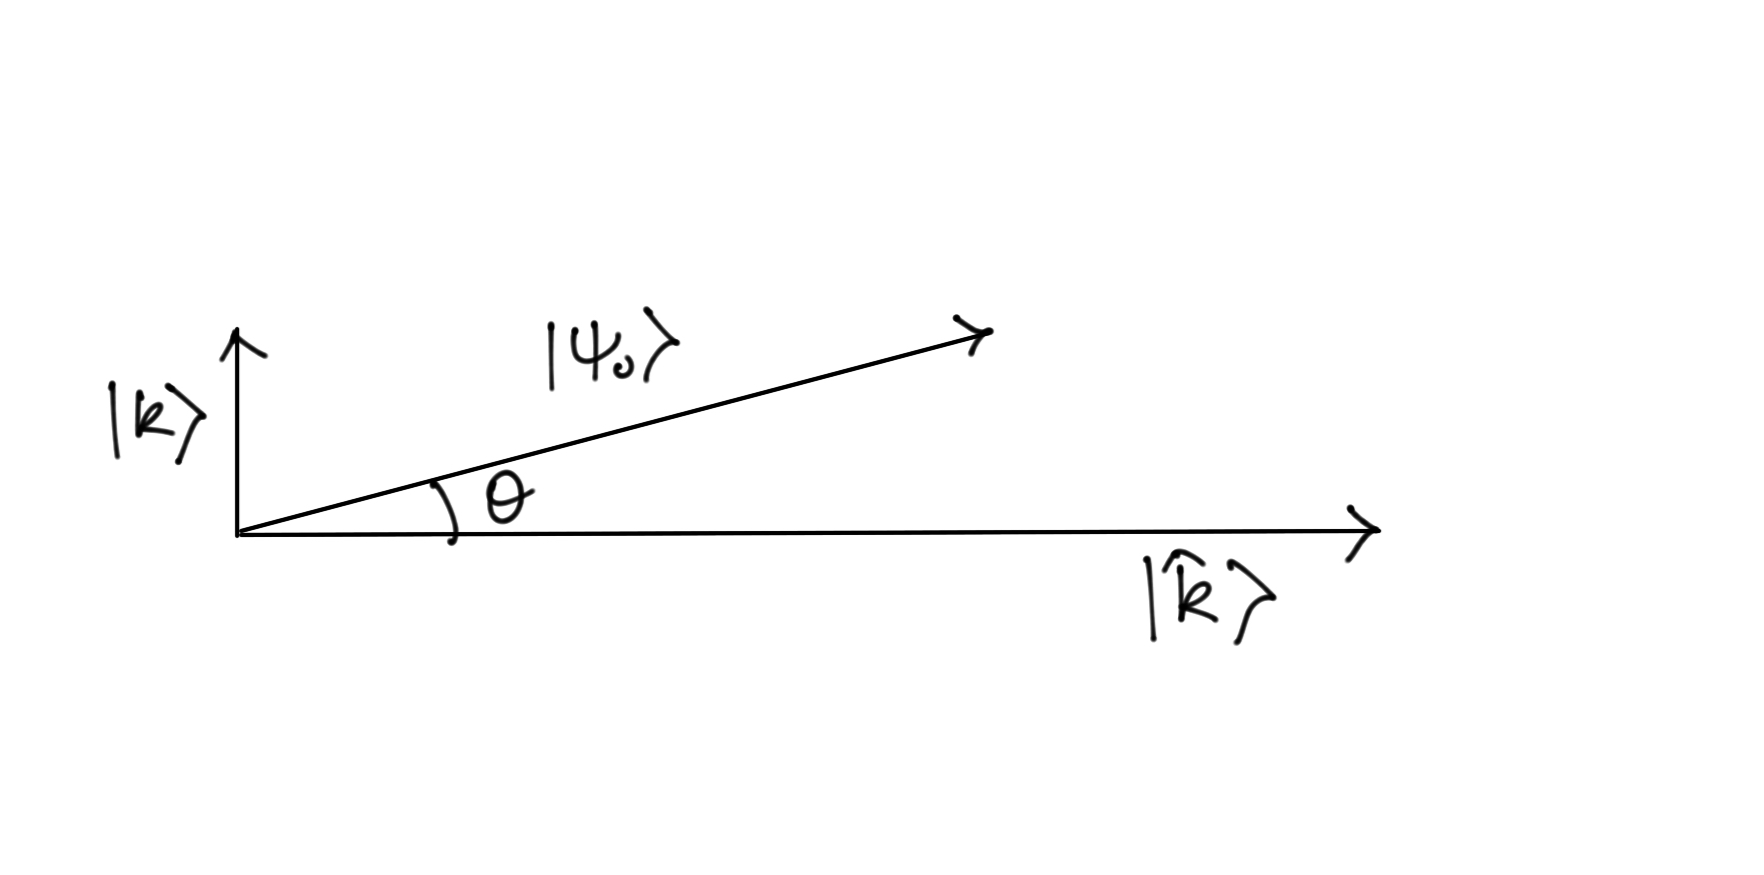

The diffusion operator works in two steps:
  - Apply $U_f$ to invert the amplitude of $\ket{\psi_i}$ corresponding to $\ket{k}$ leaving the other amplitudes unchanged.
  - Apply a _reflection_ about the uniform superposition $\ket{\psi_0}$, yielding $\ket{\psi_{i+1}}$.
 
What is a reflection operation over vectors? Let's do a linear algebra recap.

### Reflection Operation (Linear Algebra Recap)

Note that in linear algebra, suppose we had a vector $\vec{u}$ and we wished to reflect it about a unit vector $\vec{v}$, we will write $\vec{u} = a_1 \vec{v} + a_2 \vec{v}^{\perp}$. Here $\vec{v}^{\perp}$ represents orthogonal vector to $\vec{v}$. Here $a_1$ represents to the component of $\vec{u}$ along $\vec{v}$ while $a_2$ represents the component orthogonal to $\vec{v}$. The result of the reflection is given by 
$a_1 \vec{v} - a_2 \vec{v}^{\perp}$. 

As an example, consider the vector $\vec{u} = \left(\begin{matrix} 1 \\ 2 \end{matrix} \right)$ (please read it as column vector of 1 and 2). We wish to reflect it about the vector $\vec{v}=\left(\begin{matrix} \frac{1}{\sqrt{2}} \\  \frac{1}{\sqrt{2}} \end{matrix} \right)$ (the unit vector making a $45^\circ$ angle). We have 
$\vec{v}^{\perp} = \left(\begin{matrix} -\frac{1}{\sqrt{2}} \\  \frac{1}{\sqrt{2}}\end{matrix}\right)$.

Verify that can write  $ \vec{u} = \alpha_1 \vec{v} + \alpha_2 \vec{v}^{\perp}$,
wherein $\alpha_1 = \langle \vec{u}, \vec{v} \rangle = \frac{1 + 2}{\sqrt{2}} = \frac{3}{\sqrt{2}}$ and $\alpha_2 = \langle{\vec{u}, \vec{v}^{\perp}}\rangle = \frac{-1 + 2}{\sqrt{2}} = \frac{1}{\sqrt{2}}$.
Therefore, the reflection of $\vec{u}$ about the unit vector $\vec{v}$ is given by 

$$\hat{\vec{u}} = \alpha_1 \vec{v} - \alpha_2 \vec{v}^{\perp}  = \frac{3}{\sqrt{2}} \vec{v} - \frac{1}{\sqrt{2}} \vec{v}^{\perp} = \left( \begin{matrix} 2 \\  1 \end{matrix} \right) \,.$$


<img src="./reflection-illustr.jpeg" width="25%"></img>

### Diffusion Operator 

Going back to Grover search. The diffusion operator (recalled below) has two steps:

1. Apply $U_f$ to invert the amplitude of $\ket{\psi_i}$ corresponding to $\ket{k}$ leaving the other amplitudes unchanged. The figure below illustrates the application of $U_f$ to $\ket{\psi_i}$. Recall that 
$U_f$ marks $\ket{k}$ by negating its amplitude leaving the others unchanged. 


<img src="./grover-search-step-1-fig.jpeg" width="40%"></img>

Let $\phi_i$ be the angle made between $\ket{\psi_i}$ and $\ket{\hat{k}}$. The application of $U_f$ has the effect of "reflecting" $\ket{\psi_i}$ about $\ket{\hat{k}}$. Thus the result $U_f \ket{\psi_i}$ is as shown in the figure.

2.  Apply a _reflection_ of $U_f \ket{\psi_i}$ about the uniform superposition $\ket{\psi_0}$, yielding $\ket{\psi_{i+1}} = \mathsf{R}_{\psi_0} ( U_f \ket{\psi_i})$, wherein $\mathsf{R}_{\psi_0}$ is a reflection about the uniform super position $\ket{\psi_0}$.

<img src="./grover-search-step-2-fig.jpeg" width="40%"></img>


Let $\phi_i$ be the angle between $\ket{\psi_i}$ vector at the $i^{th}$ step and $\ket{\hat{k}}$. Note that 
$\phi_0 = \theta = \cos^{-1}\left( \sqrt\frac{2^n-1}{2^n} \right) = \sin^{-1} \left( \frac{1}{\sqrt{2^n}} \right) \approx \frac{1}{\sqrt{2^n}}$.

__Theorem:__ $$ \phi_{i+1} = \phi_i + 2 \theta  = (2i + 1) \theta $$

The proof is evident from the figure. The angle made by $U_f\ket{\psi_i}$ and $\ket{\hat{k}}$ is simply $- \phi_i$. The angle between $\ket{\psi_i}$ and the uniform super position $\ket{\psi_0}$ is $\theta + \phi_i$.
Since $\ket{\psi_{i+1}}$ is obtained by reflecting about $\ket{\psi_0}$, we have the angle between 
$\ket{\psi_0}$ and $\ket{\psi_{i+1}}$ is $\phi_i + \theta$. Therefore, 
$$\phi_{i+1} = \phi_{i} + \theta + \theta = \phi_i + 2 \theta \,.$$

Since $\phi_0 = \theta$, we obtain $\phi_{i} = \phi_{i-1} + 2 \theta = (2i+1) \theta$ for $i \geq 0$.

Thus after each step, the vector $\ket{\psi_{i+1}}$ is `closer` to $\ket{k}$. 

__Claim:__ The probability that measuring $\ket{\psi_i}$ yields the correct answer $\ket{k}$ is given by $\sin^2(\phi_i) = 1 - \cos^2(\phi_i)$.

The probability is given by the inner product $|\langle \psi_i | k \rangle|^2$. The inner product is the cosine of the angle 
made by $\ket{\psi_i}$ and $\ket{k}$ or the sine of the angle made by $\ket{\psi_i}$ and $\ket{\hat{k}}$  which is $\sin(\phi_i)$. Therefore, the probability is $\sin^2{\phi_i} = 1 - \cos^2(\phi_i)$.


Suppose we iterated the diffusion operator so that $\phi_i \approx \frac{\pi}{2}$ then the probability of finding  $\ket{k}$ by measuring $\ket{\psi_i}$ will be very close to $1$ (we will skip the precise calculation for now). This happens for $2 i + 1 = \frac{\pi}{2 \theta}$ or $i \approx \frac{\pi}{4 \theta} \approx \frac{\pi}{4 \times \frac{1}{\sqrt{2^n}}} = O(\sqrt{2^n})$.

<div class="alert alert-block alert-info">

Running the diffusion operator for $i = O(\sqrt{2^n})$ steps and then measuring $\ket{\psi_i}$ yields the 
    "correct answer" $\ket{k}$ with probability very close to $1$.

</div>


## Implementing the Diffusion Operator

The diffusion operator needs us to implement two operators:
  - The operator $U_f$ that "marks" the correct answer by inverting its amplitude.
  - The operator $\mathsf{R}_{\psi_0}$ that implements reflection about the uniform super position. 
  
We already noted how to implement $U_f$ using quantum kickback:
  - Implement the quantum version of the classical circuit: $Q_f$ with inputs $\ket{b_1\cdots b_n}$ and result $\ket{r}$.
  - Feed in the result qubit $\ket{r} = \ket{-} = \frac{1}{\sqrt{2}} ( \ket{0} - \ket{1})$. 
  - Ignore the result qubit (it can be reused since it is not entangled).
  
We will now work on creating the reflection about the uniform super position $\ket{\psi_0} = \frac{1}{\sqrt{2^n}} \left( \ket{0\cdots 0} + \ket{0 \cdots 1} + \cdots + \ket{1 \cdots 1} \right) = H^{\otimes n} \ket{0\cdots 0}$. We will proceed as follows to implement $\mathsf{R}_{\psi_0}$:

  - Perform a change of basis that brings $\ket{\psi_0}$ as the new basis state $\ket{0\cdots 0}$. This can be done simply by applying the Hadamard gate on $\ket{\psi_0}$:
  $$ H^{\otimes n} \ket{\psi_0} = H^{\otimes n}  H^{\otimes n} \ket{0\cdots 0} = 
\ket{0\cdots 0} \,,$$
this is aided by the simple fact that the Hadamard gate is its own inverse.
  - Invert all qubits so that $\ket{0\cdots 0} $ is transformed to $\ket{1\cdots 1}$.
  - Apply an operation that leaves all pure states other than  $\ket{1\cdots 1}$ unchanged but negates the phase on $\ket{1\cdots 1}$. This is done using the _multi controlled phase_ gate that applies a phase of $\pi$. This negates the amplitude of just the pure state $\ket{1\cdots 1}$.
  - Invert all qubits back.
  - Apply the Hadamard operation on each qubit.

In [ ]:
import numpy as np

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import Aer
def apply_reflection_about_uniform_state(qc, input_registers): 
    # qc is a previously created quantum circuit
    # input_registers are the registers that measure the input
    # n is the number of input qubits
    # 
    # 1. Apply Hadamard on each of the input registers.
    # 2. Invert all the qubits
    for i in input_registers:
        qc.h(i)
        qc.x(i)
    n = len(input_registers)
    # 3. apply a multi controlled Z gate 
    qc.mcp(np.pi, input_registers[0:n-1], input_registers[n-1])
    for i in input_registers:
        qc.x(i) # invert back
        qc.h(i) # apply Hadamard back
    


In [ ]:
input_registers = QuantumRegister(4, 'b')
qc = QuantumCircuit(input_registers)
apply_reflection_about_uniform_state(qc, input_registers)
qc.draw('mpl', style='iqp')

We are now ready to test out Grover's search algorithm. Let's use the simple circuit 

$$f(b_1, b_2, b_3) = (b_1 \land \neg b_2 \land b_3)  $$ 

In [ ]:
import numpy as np

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import Aer
def Uf(qc, inputs, output):
    # copied from the beginning of this lecture
    ## Now create the circuit for f
    #negage b2
    qc.x(inputs[1])
    # and the three gates into output
    # we will use the multi-controlled x gate with b1, b2, b3 as controls and r as the output
    qc.mcx([inputs[0], inputs[1], inputs[2]], output[0])
    # restore the b2 line back to original value
    qc.x(inputs[1])
    # this is it!!

In [ ]:
def create_grover_circuit(qc, inputs, result, classical_bits, n_iterations):
    # initialize the three gates to a uniform super position
    qc.h(inputs[0])
    qc.h(inputs[1])
    qc.h(inputs[2])
    # initialize the result register to 1/sqrt(2) ( |0> - |1> )
    qc.x(result[0]) # first apply the not gate to turn it from |0> to |1>
    qc.h(result[0]) # apply hadamard gate 
    for i in range(n_iterations):
        qc.barrier()
        Uf(qc, inputs, result)
        apply_reflection_about_uniform_state(qc, inputs)
    # Now perform a measurement
    qc.measure(inputs, classical_bits)


In [ ]:
inputs = QuantumRegister(3, 'b')
output = QuantumRegister(1, 'r')
cbit = ClassicalRegister(3, 'z')
qc = QuantumCircuit(inputs, output, cbit)
create_grover_circuit(qc, inputs, output, cbit, 1)
qc.draw('mpl', style="iqp")

In [ ]:
from qiskit.visualization import plot_histogram
from qiskit import transpile
print('Grover Search After One Iteration')
# lets test after one iteration
simulator = Aer.get_backend('aer_simulator')
circ = transpile(qc, simulator)

# Run and get counts
result = simulator.run(qc).result()
counts = result.get_counts(circ)
plot_histogram(counts, title='result counts (1000 simulations)')

In [ ]:
inputs = QuantumRegister(3, 'b')
output = QuantumRegister(1, 'r')
cbit = ClassicalRegister(3, 'z')
qc = QuantumCircuit(inputs, output, cbit)
create_grover_circuit(qc, inputs, output, cbit, 2)
qc.draw('mpl', style="iqp")


In [ ]:
print('Grover Search After Two Iterations')
# lets test after one iteration
simulator = Aer.get_backend('aer_simulator')
circ = transpile(qc, simulator)

# Run and get counts
result = simulator.run(qc).result()
counts = result.get_counts(circ)
plot_histogram(counts, title='result counts (1000 simulations)')

Notice that the probability of the correct answer after just two iterations is very close to $1$, nearly $0.95$. Also note that $\sqrt{8} \approx 2$.

## Example -2 

Let us use an example where there are multiple solutions. Consider the Boolean function that represents a formula in conjunctive normal form.

$$ f(b_1, b_2, b_3, b_4, b_5) = ( b_1 \lor \neg b_2 \lor b_3) \land\ (b_3\ \lor\ b_4\ \lor b_5\ \lor b_6) \ \land\ (b_1 \ \lor\ b_4\ \lor\ b_5) $$

We would like to use Grover's search. 

First we will make up a quantum circuit for this formula.

In [ ]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, AncillaRegister, transpile
from qiskit_aer import Aer

def implement_clause(qc, inputs, cl, res):
    # go through each clause 
    ctrl_qubits = []
    for idx in cl:
        if idx < 0:
            ctrl_qubits.append(inputs[-idx-1])
        else:
            qc.x(inputs[idx-1])
            ctrl_qubits.append(inputs[idx-1])
    qc.mcx(ctrl_qubits, res)
    qc.x(res)
    for idx in cl:
        if idx > 0:
            qc.x(inputs[idx-1])
    qc.barrier()
    return qc 

def cnf_formula_circuit(qc, inputs, result, clauses):
    # implement a quantum circuit with input qubits, result qubit and a bunch of clauses
    # Use ancillary bits to encode clauses
    a = AncillaRegister(len(clauses)) # add as many as the number of clauses
    qc.add_register(a)
    for (j, cl) in enumerate(clauses):
        # Add an ancillary qubit
        implement_clause(qc, inputs, cl, a[j])
    # implement the and of all the ancillary bits.
    qc.mcx(a, result)
    return qc

In [ ]:
inputs = QuantumRegister(5, 'b')
res = QuantumRegister(1, 'r')
clauses = [ [1, -2, 3], [-3, -4,5], [1, 4, 5]]
qc = QuantumCircuit(inputs, res)
cnf_formula_circuit(qc, inputs, res, clauses)
qc.draw('mpl', style='iqp')

In [ ]:
# let's now implement Grover's search to find a value 

def Uf(qc, inputs, output):
    clauses = [ [1, -2, 3], [-3, -4,5], [1, 4, 5]]
    cnf_formula_circuit(qc, inputs, output, clauses)
   
def Grover_diffuse(qc, inputs, output):
    Uf(qc, inputs, output)
    apply_reflection_about_uniform_state(qc, inputs)
    qc.barrier()

def create_quantum_circuit_for_grover(n_iters):
    inputs = QuantumRegister(5, 'b')
    res = QuantumRegister(1, 'r')
    cbit = ClassicalRegister(5, 'z')
    qc = QuantumCircuit(inputs, res, cbit)
    for i in inputs:
        qc.h(i) # apply hadamard
    # now prepare the result register to $|->$
    qc.x(res) # invert it
    qc.h(res) # apply Hadamard
    qc.barrier()
    for i in range(n_iters):
        Grover_diffuse(qc, inputs, res)
    qc.measure(inputs, cbit)
    return qc

qc2 = create_quantum_circuit_for_grover(2)
qc2.draw('mpl', style='iqp')

In [ ]:
from qiskit.visualization import plot_histogram
print('Grover Search After Two Iterations')
# lets test after one iteration
simulator = Aer.get_backend('aer_simulator')
circ = transpile(qc2, simulator)

# Run and get counts
result = simulator.run(qc2).result()
counts = result.get_counts(circ)
plot_histogram(counts, title='result counts (1000 simulations)')

In [ ]:
qc4 = create_quantum_circuit_for_grover(4)# 4 iterations of grover's search
qc4.draw('mpl', style='iqp')

In [ ]:
from qiskit.visualization import plot_histogram
print('Grover Search After Four Iterations')
# lets test after one iteration
simulator = Aer.get_backend('aer_simulator')
circ = transpile(qc4, simulator)

# Run and get counts
result = simulator.run(qc4).result()
counts = result.get_counts(circ)
plot_histogram(counts, title='result counts (1000 simulations)')

Notice that Grover's search works: when measured, the output satisfies the formula with a very high probability.

In [ ]:
qc6 = create_quantum_circuit_for_grover(6)# 6 iterations of grover's search
qc6.draw('mpl', style='iqp')

In [ ]:
# this will take a long time: run at your own peril !!! 
from qiskit.visualization import plot_histogram
print('Grover Search After Six Iterations')
# lets test after one iteration
simulator = Aer.get_backend('aer_simulator')
circ = transpile(qc6, simulator)

# Run and get counts
result = simulator.run(qc6).result()
counts = result.get_counts(circ)
plot_histogram(counts, title='result counts (1000 simulations)')

Two key issues are left (a) what happens if there are more than one solutions to the formula? (b) How do we know after which iteration  to stop and measure?

Grover's search works even if there are multiple solutions. But it is hard to say how many iterations will be needed since it is inversely proportional to the number of solutions. We do not know that number up front. 
What we can do is to run Grover search for a random number of iterations $k$ where $k$ is sampled between $1$ and $\sqrt{2^n}$, say. It can be shown that if measured after a random number of iteration, it yields a solution with at least 50\% chance.

Hopefully, you have witnessed how Grover's very nice algorithm ends up using the intricacies of quantum mechanics to do something that is considered impossible classically.